In [80]:
#  add inline magic
%matplotlib inline

# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os # in case we need to merge files from an unknown path

# get the files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# read files into DFs

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [81]:
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [82]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [83]:
# inspect the data for city_df

city_df.count()
# same number of data points per column

city            120
driver_count    120
type            120
dtype: int64

In [84]:
city_df.isnull().sum()
# no cells are null

city            0
driver_count    0
type            0
dtype: int64

In [85]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [86]:
# show unique values in column "type"
city_df["type"].unique()
# shows 3 conditions for "type"

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [87]:
# shows how many datapoints for the condition "urban"
sum(city_df["type"]=="Urban")

66

In [88]:
# shows how many datapoints for the condition "suburban"
sum(city_df["type"]=="Suburban")

36

In [89]:
# shows how many datapoints for the condition "rural"
sum(city_df["type"]=="Rural")

18

In [90]:
# inspect the data for ride_df
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [91]:
# merge dfs to one df

pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [92]:
# use filtering to create a df per TYPE
# make one DF for each of the 3 TYPES
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [93]:
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [94]:
rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [95]:
#  create a DS with city as the index, group by # rides per city, 
# and count ride_ids for each group  
# ride_ids are good for this because each one is unique
# make a DS for each TYPE

urban_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_count  # this is a DS with city as the index

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [96]:
suburban_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_count = rural_df.groupby(["city"]).count()["ride_id"]

In [97]:
# create 3 DS for each city type
# grouped by city name (index)
# with ave fare per city
urban_avefare = urban_df.groupby(["city"]).mean()["fare"]
urban_avefare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [98]:
suburban_avefare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avefare = rural_df.groupby(["city"]).mean()["fare"]

In [99]:
# create 3 DS for each city type
# grouped by city name (index)
# with count of drivers per city
urban_drivers = urban_df.groupby(["city"]).count()["driver_count"]
urban_drivers.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: driver_count, dtype: int64

In [100]:
suburban_drivers = suburban_df.groupby(["city"]).count()["driver_count"]
rural_drivers = rural_df.groupby(["city"]).count()["driver_count"]

Text(0.5, 0, 'Total Number of Rides (Per City)')

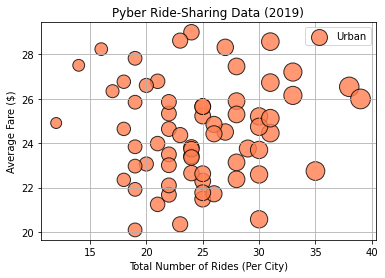

In [101]:
# Build the SCATTER BUBBLE PLOT for URBAN

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

Text(0.5, 0, 'Total Number of Rides (Per City)')

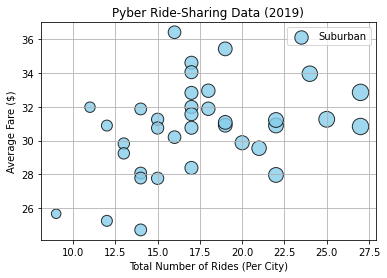

In [102]:
# Build the SCATTER BUBBLE PLOT for SUBURBAN
plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

Text(0.5, 0, 'Total Number of Rides (Per City)')

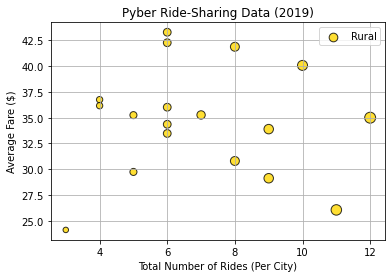

In [103]:
# Build the SCATTER BUBBLE PLOT for RURAL
plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

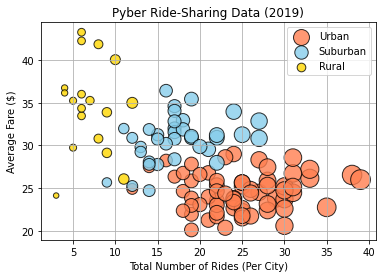

In [104]:
# combine all the plots together by running the code together

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.show()

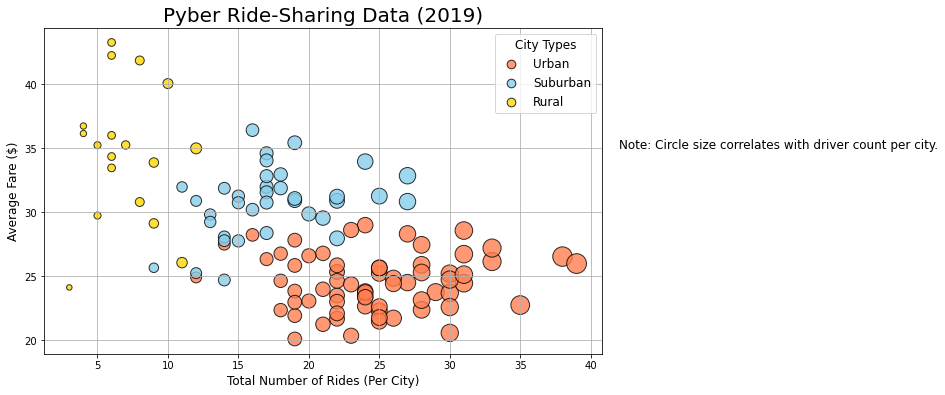

In [106]:
#  update with labels, title and increase fonts
#  pull out the redundencies and group 

plt.subplots(figsize=(10,6))  # increases overall size of the chart

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )

plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )

plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )

# group redundencies and increase font
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.legend()
plt.grid(True)

# note the legend dots are not the same size initially
# add parameters to correct
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)  # Legend title font

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
# Must do this before plt.show()
plt.savefig("analysis/Fig1.png")

plt.show()